In [ ]:
!pip install kaggle


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
drive_path = "/content/drive/MyDrive/SpamDetection"

In [ ]:


# Make sure the folder exists
!mkdir -p "$drive_path"
# Download dataset directly into the Drive folder
!kaggle datasets download -d bayes2003/emails-for-spam-or-ham-classification-trec-2005 -p "$drive_path"


Dataset URL: https://www.kaggle.com/datasets/bayes2003/emails-for-spam-or-ham-classification-trec-2005
License(s): ODbL-1.0


In [ ]:
!unzip "$drive_path/emails-for-spam-or-ham-classification-trec-2005.zip" -d "$drive_path"


Archive:  /content/drive/MyDrive/SpamDetection/emails-for-spam-or-ham-classification-trec-2005.zip
  inflating: /content/drive/MyDrive/SpamDetection/email_origin.csv  
  inflating: /content/drive/MyDrive/SpamDetection/email_text.csv  
  inflating: /content/drive/MyDrive/SpamDetection/trec05p-1.tgz  


In [ ]:
import pandas as pd

In [ ]:
#Origin emails contain unclean data

In [ ]:
df_email_origin = pd.read_csv(drive_path + "/email_origin.csv")
df_email_origin.head(1)['origin']

,origin
0,Received: from NAHOU-MSMBX01V ([192.168.110.39...


In [ ]:
print(df_email_origin.loc[0, 'origin'])

Received: from NAHOU-MSMBX01V ([192.168.110.39]) by NAHOU-MSMBX05V.corp.enron.com with Microsoft SMTPSVC(5.0.2195.1600);
	 Fri, 29 Jun 2001 08:36:10 -0500
X-MimeOLE: Produced By Microsoft Exchange V6.0.4418.65
content-class: urn:content-classes:message
Subject: FW: June 29 -- BNA, Inc. Daily Labor Report
MIME-Version: 1.0
Content-Type: text/plain;
Content-Transfer-Encoding: binary
Date: Fri, 29 Jun 2001 08:36:09 -0500
Message-ID: <77DA52C3FD86904D8209C9750CD310B9C79BB3@NAHOU-MSMBX01V.corp.enron.com>
X-MS-Has-Attach: 
X-MS-TNEF-Correlator: <77DA52C3FD86904D8209C9750CD310B9C79BB3@NAHOU-MSMBX01V.corp.enron.com>
Thread-Topic: June 29 -- BNA, Inc. Daily Labor Report
Thread-Index: AcEAUaYbkE2KMWxCEdWxEABQi+MJ2QATr4SA
From: "Hu, Sylvia" <Sylvia.Hu@ENRON.com>
To: "Acevedo, Felecia" <Felecia.Acevedo@ENRON.com>,
	"Brown, MeCole" <MeCole.Brown@ENRON.com>,
	"Cash, Michelle" <Michelle.Cash@ENRON.com>,
	"Castellano, Bonne" <Bonne.Castellano@ENRON.com>,
	"Johnson, Rick" <Rick.Johnson@ENRON.com>,
	"Ly

In [ ]:
import email

In [ ]:
def read_email_from_string(s):
    message = email.message_from_string(s)
    return message

In [ ]:
def extract_email_body(message):
    if message.is_multipart():
        for part in message.walk():
            type_content = part.get_content_maintype()
            if type_content == 'text':
                message = part
                break
        else:
            return 'escapenonetext'

    if message.get('Content-Transfer-Encoding') == 'base64':
        try:
            body = message.get_payload(decode=True).decode()
        except:
            body = message.get_payload(decode=True).decode(encoding='ISO-8859-1')
    else:
        body = message.get_payload(decode=False)
    return body


In [ ]:
from bs4 import BeautifulSoup
import re
def remove_html(s):
    soup = BeautifulSoup(s, 'lxml')
    for sp in soup(['script', 'style', 'head', 'meta', 'noscript']):
        sp.decompose()
    s = ' '.join(soup.stripped_strings)
    return s

In [ ]:
def email_body_to_text(body):
    body = remove_html(body)
    punctuation = '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~'
    body = re.sub('[{}]'.format(punctuation), ' ', body)
    body = re.sub('\n+', ' ', body)
    body = re.sub('\\s+', ' ', body)
    body = re.sub(r'[0-9]+', 'escapenumber', body)
    body = body.lower()
    body = re.sub(r'[a-z0-9]{20,}', 'escapelong', body)
    return body

In [ ]:
df_email_origin['text'] = df_email_origin['origin'].map(read_email_from_string).map(extract_email_body).map(email_body_to_text)
df_email_origin

,label,origin,text
0,0,Received: from NAHOU-MSMBX01V ([192.168.110.39...,user id enrondlr pw bnawebescapenumber origina...
1,0,Received: from nahou-msmbx03v.corp.enron.com (...,hi chris tonight we are rolling out a new repo...
2,0,Received: from NAHOU-MSMBX01V ([192.168.110.39...,rika r these new original message from thomas ...
3,0,Received: from NAHOU-MSMBX01V ([192.168.110.39...,john gerald we are currently trading under gtc...
4,0,Received: from nahou-msmbx03v.corp.enron.com (...,gerald and stacy attached is a worksheet for a...
...,...,...,...
92184,1,Received: from nahou-mscnx06p.corp.enron.com (...,www loveinfashion com username customer passwo...
92185,1,Received: from nahou-mscnx06p.corp.enron.com (...,www loveinfashion com username customer passwo...
92186,1,Received: from nahou-mscnx06p.corp.enron.com (...,www loveinfashion com username customer passwo...
92187,1,Received: from nahou-mscnx06p.corp.enron.com (...,www loveinfashion com username customer passwo...


In [ ]:
df_email_dp_dup = df_email_origin.drop_duplicates(subset='text')
df_email_dp_dup

,label,origin,text
0,0,Received: from NAHOU-MSMBX01V ([192.168.110.39...,user id enrondlr pw bnawebescapenumber origina...
1,0,Received: from nahou-msmbx03v.corp.enron.com (...,hi chris tonight we are rolling out a new repo...
2,0,Received: from NAHOU-MSMBX01V ([192.168.110.39...,rika r these new original message from thomas ...
3,0,Received: from NAHOU-MSMBX01V ([192.168.110.39...,john gerald we are currently trading under gtc...
4,0,Received: from nahou-msmbx03v.corp.enron.com (...,gerald and stacy attached is a worksheet for a...
...,...,...,...
92176,1,Received: from nahou-mscnx06p.corp.enron.com (...,dear amazon com costumer we regret to inform y...
92177,1,Received: from nahou-mscnx06p.corp.enron.com (...,www loveinfashion com username customer passwo...
92178,1,Received: from nahou-mscnx06p.corp.enron.com (...,opt in email special offer nbsp unsubscribe me...
92179,1,Received: from nahou-mscnx06p.corp.enron.com (...,­ì¨ó¦bág·ë¦³­ó¦p¦¹àu½èªº¶º©± §aáù¤£ª¾¹d¶ü ¤w¥h...


In [ ]:
df_email_dp_na = df_email_dp_dup[df_email_dp_dup['text'].str.contains(r"\b\w+\b")]
df_email_dp_na

,label,origin,text
0,0,Received: from NAHOU-MSMBX01V ([192.168.110.39...,user id enrondlr pw bnawebescapenumber origina...
1,0,Received: from nahou-msmbx03v.corp.enron.com (...,hi chris tonight we are rolling out a new repo...
2,0,Received: from NAHOU-MSMBX01V ([192.168.110.39...,rika r these new original message from thomas ...
3,0,Received: from NAHOU-MSMBX01V ([192.168.110.39...,john gerald we are currently trading under gtc...
4,0,Received: from nahou-msmbx03v.corp.enron.com (...,gerald and stacy attached is a worksheet for a...
...,...,...,...
92176,1,Received: from nahou-mscnx06p.corp.enron.com (...,dear amazon com costumer we regret to inform y...
92177,1,Received: from nahou-mscnx06p.corp.enron.com (...,www loveinfashion com username customer passwo...
92178,1,Received: from nahou-mscnx06p.corp.enron.com (...,opt in email special offer nbsp unsubscribe me...
92179,1,Received: from nahou-mscnx06p.corp.enron.com (...,­ì¨ó¦bág·ë¦³­ó¦p¦¹àu½èªº¶º©± §aáù¤£ª¾¹d¶ü ¤w¥h...


In [ ]:
df_email_dp_na[['label', 'text']].to_csv(drive_path + "/clean_data_text.csv", index=False, escapechar='\\')

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
drive_path = "/content/drive/MyDrive/SpamDetection"
clean_data = pd.read_csv(drive_path + "/clean_data_text.csv")
clean_data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,label,text
0,0,user id enrondlr pw bnawebescapenumber origina...
1,0,hi chris tonight we are rolling out a new repo...
2,0,rika r these new original message from thomas ...
3,0,john gerald we are currently trading under gtc...
4,0,gerald and stacy attached is a worksheet for a...
...,...,...
55070,1,dear amazon com costumer we regret to inform y...
55071,1,www loveinfashion com username customer passwo...
55072,1,opt in email special offer nbsp unsubscribe me...
55073,1,­ì¨ó¦bág·ë¦³­ó¦p¦¹àu½èªº¶º©± §aáù¤£ª¾¹d¶ü ¤w¥h...


In [ ]:
print(clean_data.loc[0, 'text'])

user id enrondlr pw bnawebescapenumber original message from bna highlights sent thursday june escapenumber escapenumber escapenumber escapenumber pm to bna highlights subject june escapenumber bna inc daily labor report daily labor report highlights table of contents june escapenumber escapenumber issn escapenumber escapenumber registered web subscribers can access the full text of these articles by using the url link supplied information about becoming a subscriber or signing up for a free web trial is available at http web bna com or call bna customer relations at escapenumber escapenumber escapenumber escapenumber mon fri escapenumber escapenumber am escapenumber escapenumber pm et highlights d c circuit overturns nlrb decision on workplace conduct policies a california firm's two workplace policies barring abusive and threatening language and restricting solicitation and distribution did not constitute unfair labor practices the district of columbia circuit rules overturning a nat

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization, Embedding, LSTM, Bidirectional, Dense, Input
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

In [ ]:
texts = clean_data['text'].values  # your cleaned raw text
labels = clean_data['label'].values  # 0 = ham, 1 = spam

# Split the data
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)


In [ ]:
# Define text vectorization layer
max_tokens = 10000         # vocab size
sequence_length = 200      # max words per email
vectorizer = TextVectorization(
    max_tokens=max_tokens,
    output_mode='int',
    output_sequence_length=sequence_length
)

In [ ]:
vectorizer.adapt(X_train)

# Create the model
text_input = Input(shape=(1,), dtype=tf.string, name='email_text')
x = vectorizer(text_input)
x = Embedding(input_dim=max_tokens, output_dim=128)(x)
x = Bidirectional(LSTM(64))(x)
x = Dense(64, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)


In [ ]:
model = Model(text_input, output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model.save(drive_path + "/spam_detection_model.keras")

In [ ]:
model = tf.keras.models.load_model(drive_path + "/spam_detection_model.keras")

In [ ]:
import numpy as np

emails = np.array([
    "Dear Lucky Winner,We are pleased to inform you that YOU HAVE WON $5,000,000.00 USD (FIVE MILLION UNITED STATES DOLLARS) in the 2025 Global Mega Lottery Draw sponsored by Microsoft, Coca-Cola, and the United Nations Charity Board.Your email ID was selected randomly by our computer system. To claim your prize, you MUST respond IMMEDIATELY with the following information:Full Name:Age:Country:Mobile Number:Bank Account Details (for swift transfer):This offer is VALID FOR 48 HOURS ONLY. Failure to respond will result in CANCELLATION of your winning rights!!!🛑 This is 100% LEGITIMATE and approved by the World Bank and IMF 🛑Please reply to our secure email: payment.claims@secure-fastpay.orgor contact our Agent: Mr. Greg Wilson on WhatsApp: +447938000192"
], dtype=object)

predictions = model.predict(emails)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
[[0.9998294]]


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size=32)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


345/345 ━━━━━━━━━━━━━━━━━━━━ 34s 94ms/step - accuracy: 0.9746 - loss: 0.0859
Test Loss: 0.0812
Test Accuracy: 0.9750


In [ ]:
y_pred_prob = model.predict(X_test, batch_size=32)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()


345/345 ━━━━━━━━━━━━━━━━━━━━ 24s 67ms/step


              precision    recall  f1-score   support

           0       0.98      0.97      0.98      6067
           1       0.97      0.98      0.97      4948

    accuracy                           0.98     11015
   macro avg       0.97      0.98      0.97     11015
weighted avg       0.98      0.98      0.98     11015



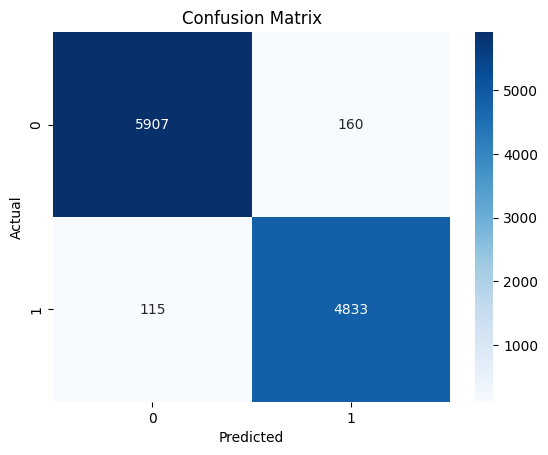

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 16.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system =

In [ ]:
!pip install transformers -q


In [ ]:
import pandas as pd
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split


In [ ]:
train_texts, val_texts, train_labels, val_labels = train_test_split(
    clean_data['text'].tolist(), clean_data['label'].tolist(), test_size=0.2, random_state=42
)

In [ ]:
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)

max_len = 128

In [ ]:
def tokenize(texts, labels):
    tokens = tokenizer(texts, padding='max_length', truncation=True, max_length=max_len, return_tensors='tf')
    return {
        'input_ids': tokens['input_ids'],
        'attention_mask': tokens['attention_mask']
    }, tf.convert_to_tensor(labels)

train_encodings, train_labels = tokenize(train_texts, train_labels)
val_encodings, val_labels = tokenize(val_texts, val_labels)

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_encodings, train_labels)).shuffle(1000).batch(32)
val_dataset = tf.data.Dataset.from_tensor_slices((val_encodings, val_labels)).batch(32)


Found existing installation: Keras 2.3.1
Uninstalling Keras-2.3.1:
  Successfully uninstalled Keras-2.3.1


In [ ]:
model = TFBertForSequenceClassification.from_pretrained(model_name, num_labels=2)

from transformers import BertTokenizer, TFBertForSequenceClassification
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
import tensorflow as tf

model.compile(
    optimizer=Adam(learning_rate=5e-5),
    loss=SparseCategoricalCrossentropy(),
    metrics=[SparseCategoricalAccuracy()]
)

model.fit(train_dataset, validation_data=val_dataset, epochs=3)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


AttributeError: 'Variable' object has no attribute '_distribute_strategy'

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf
import pandas as pd

# Load data
df = clean_data
texts = df["text"].tolist()
labels = df["label"].tolist()

# Load tokenizer and tokenize
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
encodings = tokenizer(texts, truncation=True, padding=True, max_length=128, return_tensors="tf")

# Prepare dataset
dataset = tf.data.Dataset.from_tensor_slices((
    dict(encodings),
    tf.convert_to_tensor(labels)
)).batch(16)

# Load model
model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

# Optimizer and loss
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Custom training loop
@tf.function
def train_step(batch_inputs, batch_labels):
    with tf.GradientTape() as tape:
        logits = model(batch_inputs, training=True).logits
        loss = loss_fn(batch_labels, logits)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss

# Train for a few epochs
for epoch in range(3):
    print(f"\nEpoch {epoch+1}")
    for step, (batch_inputs, batch_labels) in enumerate(dataset):
        loss = train_step(batch_inputs, batch_labels)
        if step % 10 == 0:
            print(f"Step {step}, Loss: {loss.numpy():.4f}")


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Epoch 1
Step 0, Loss: 0.7225
Step 10, Loss: 0.7763
Step 20, Loss: 0.3909
Step 30, Loss: 0.6746
Step 40, Loss: 0.6683
Step 50, Loss: 0.4236
Step 60, Loss: 0.0296
Step 70, Loss: 0.7942
Step 80, Loss: 0.5586
Step 90, Loss: 0.7462
Step 100, Loss: 0.9764
Step 110, Loss: 0.3630
Step 120, Loss: 0.3494
Step 130, Loss: 0.4786
Step 140, Loss: 0.6832
Step 150, Loss: 0.7540
Step 160, Loss: 0.4188
Step 170, Loss: 0.6001
Step 180, Loss: 0.4629
Step 190, Loss: 0.2193
Step 200, Loss: 0.5760
Step 210, Loss: 0.2417
Step 220, Loss: 0.3558
Step 230, Loss: 0.1111
Step 240, Loss: 0.2326
Step 250, Loss: 0.3742
Step 260, Loss: 0.3373
Step 270, Loss: 0.1396
Step 280, Loss: 0.0858
Step 290, Loss: 0.5235
Step 300, Loss: 0.1698
Step 310, Loss: 0.1463
Step 320, Loss: 0.9255
Step 330, Loss: 0.1246
Step 340, Loss: 0.0448
Step 350, Loss: 0.5418
Step 360, Loss: 0.0410
Step 370, Loss: 0.2025
Step 380, Loss: 0.0224
Step 390, Loss: 0.1287
Step 400, Loss: 0.0474
Step 410, Loss: 0.3924
Step 420, Loss: 0.0099
Step 430, Los